In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme()

In [225]:
data = pd.read_csv('/home/chri6578/Documents/CES/logs/discovery4.log',
                header=None,)

data.columns = ['trial', 'p0', 'n', 'T', 'taudiff', 'acc', 'sgnacc']

In [226]:
# data[data['n']==20]

Text(0, 0.5, 'accuracy')

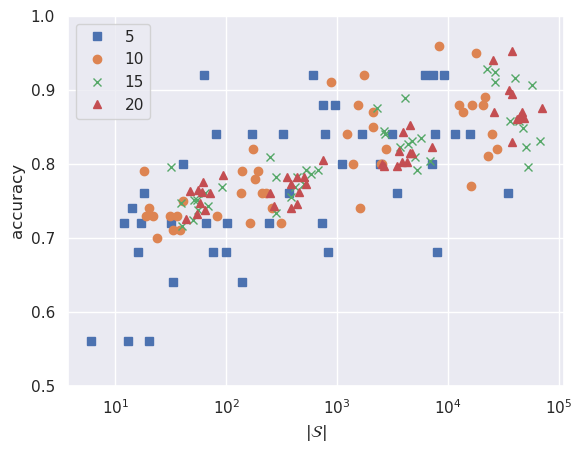

In [227]:
plt.semilogx( data[(data['n']==5) & (data['taudiff']==0) & (data['trial']< 11)].groupby('T')['acc'].mean(), 's', label='5')
plt.semilogx( data[(data['n']==10) & (data['taudiff']==0) & (data['trial']< 11)].groupby('T')['acc'].mean(), 'o', label='10')
plt.semilogx( data[(data['n']==15) & (data['taudiff']==0) & (data['trial']< 11)].groupby('T')['acc'].mean(), 'x', label='15')
plt.semilogx( data[(data['n']==20) & (data['taudiff']==0) & (data['trial']< 11)].groupby('T')['acc'].mean(), '^', label='20')
plt.legend()
plt.ylim([0.5,1])
plt.xlabel('$ |\mathcal{S}| $')
plt.ylabel('accuracy')

Text(0, 0.5, 'sign accuracy')

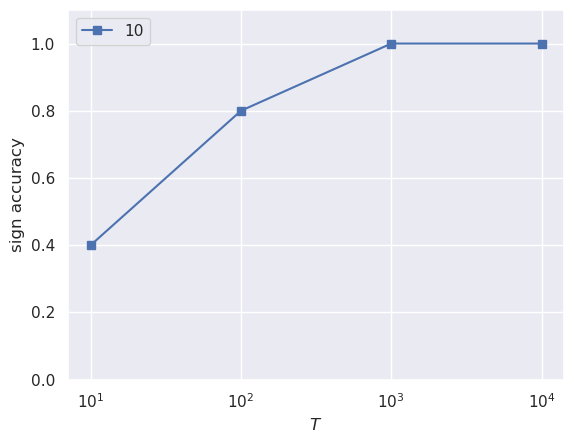

In [114]:
# plt.semilogx( data[(data['n']==5) & (data['taudiff']==0)  & (data['trial']< 11)].groupby('T')['sgnacc'].mean(), 's-', label='5')
plt.semilogx( data[(data['n']==10) & (data['taudiff']==0) & (data['trial']< 11)].groupby('T')['sgnacc'].mean(), 's-', label='10')
# plt.semilogx( data[(data['n']==15) & (data['taudiff']==0) & (data['trial']< 11)].groupby('T')['sgnacc'].mean(), 's-', label='15')
# plt.semilogx( data[(data['n']==20) & (data['taudiff']==0) & (data['trial']< 11)].groupby('T')['sgnacc'].mean(), 's-', label='20')
plt.legend()
plt.ylim([0,1.1])
plt.xlabel('$ T $')
plt.ylabel('sign accuracy')

Text(0, 0.5, 'accuracy')

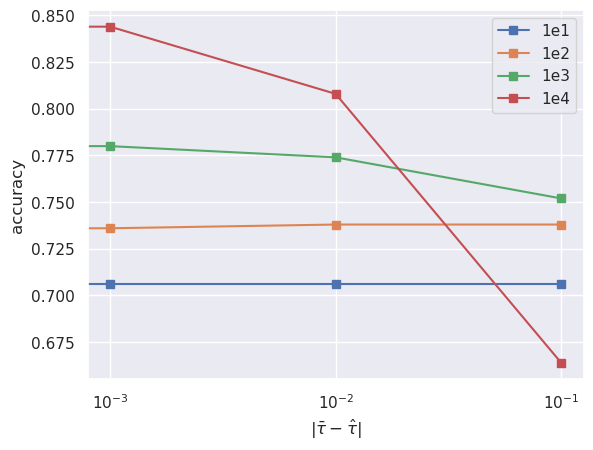

In [96]:
N = 10

plt.semilogx( data[(data['n']==N) & (data['T']==10) & (data['trial']< 11)].groupby('taudiff')['acc'].mean(), 's-', label='1e1')
plt.semilogx( data[(data['n']==N) & (data['T']==100) & (data['trial']< 11)].groupby('taudiff')['acc'].mean(), 's-', label='1e2')
plt.semilogx( data[(data['n']==N) & (data['T']==1000) & (data['trial']< 11)].groupby('taudiff')['acc'].mean(), 's-', label='1e3')
plt.semilogx( data[(data['n']==N) & (data['T']==10000) & (data['trial']< 11)].groupby('taudiff')['acc'].mean(), 's-', label='1e4')
plt.legend()
plt.xlabel('$ |\\bar{\\tau} - \hat{\\tau}| $')
plt.ylabel('accuracy')

Text(0, 0.5, 'sign accuracy')

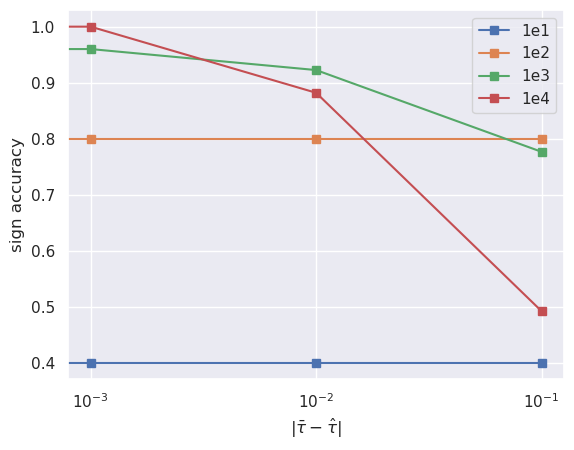

In [106]:

N = 10
plt.semilogx( data[(data['n']==N) & (data['T']==10) & (data['trial']< 11)].groupby('taudiff')['sgnacc'].mean(), 's-', label='1e1')
plt.semilogx( data[(data['n']==N) & (data['T']==100) & (data['trial']< 11)].groupby('taudiff')['sgnacc'].mean(), 's-', label='1e2')
plt.semilogx( data[(data['n']==N) & (data['T']==1000) & (data['trial']< 11)].groupby('taudiff')['sgnacc'].mean(), 's-', label='1e3')
plt.semilogx( data[(data['n']==N) & (data['T']==10000) & (data['trial']< 11)].groupby('taudiff')['sgnacc'].mean(), 's-', label='1e4')
plt.legend()
plt.xlabel('$ |\\bar{\\tau} - \hat{\\tau}| $')
plt.ylabel('sign accuracy')

In [117]:
np.log10(2**50)

15.05149978319906

Text(0, 0.5, 'accuracy')

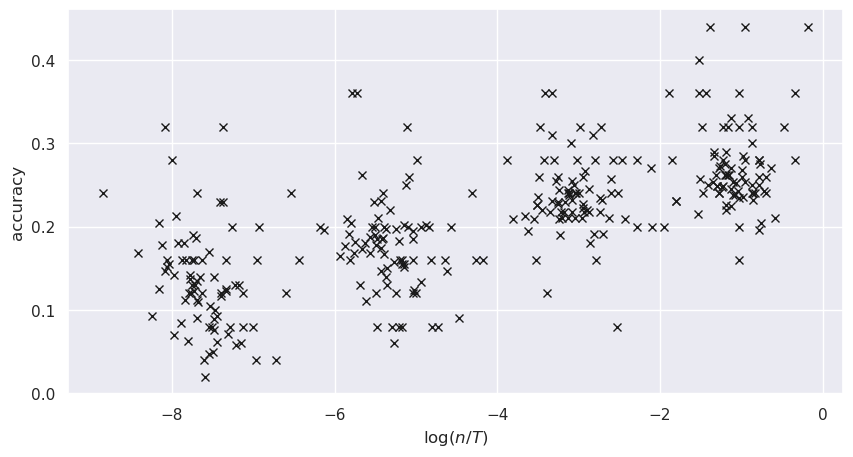

In [222]:
data0 = data[(data['taudiff']==0) & (data['n']<=20)]

plt.figure(figsize=(10,5))
for xn, xT, xacc, xsgnacc in zip(data0['n'], data0['T'], data0['acc'], data0['sgnacc']):
    plt.plot(np.log(xn/xT), 1- xacc, 'kx')
    
plt.xlabel('$ \log(n/T) $')
plt.ylabel('accuracy')

Text(0, 0.5, 'accuracy')

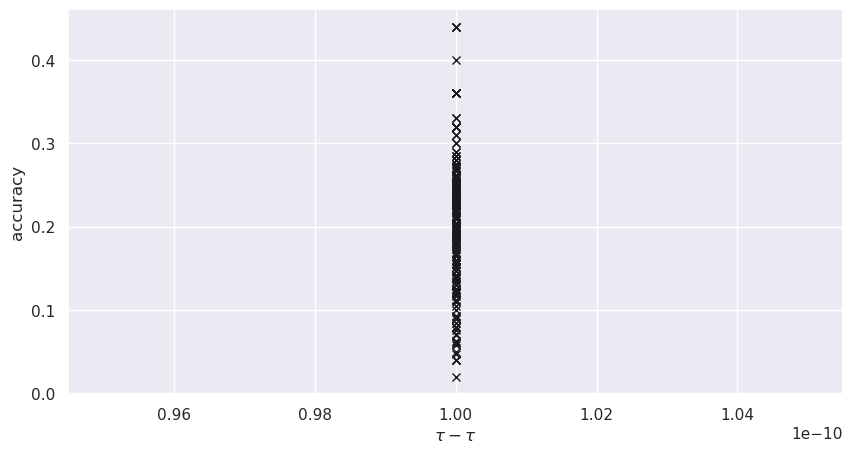

In [223]:
data0 = data[data['n']<30]

plt.figure(figsize=(10,5))
for xtaudiff, xacc, xsgnacc in zip(data0['taudiff'], data0['acc'], data0['sgnacc']):
    plt.plot(np.sqrt(1e-20+xtaudiff), 1- xacc, 'kx')
    
plt.xlabel('$ \\tau - \\tau$')
plt.ylabel('accuracy')

Text(0, 0.5, 'accuracy')

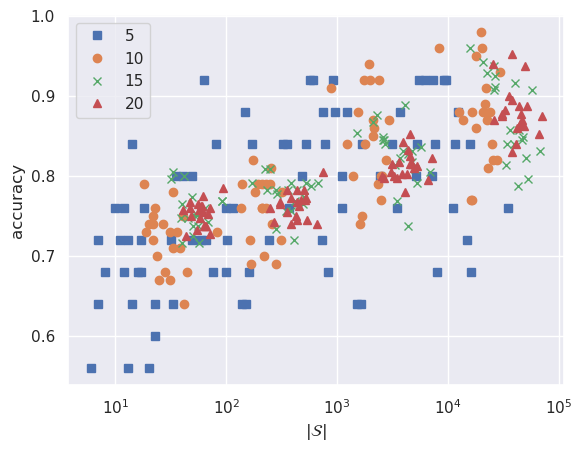

In [234]:

n_vec = [5, 10, 15, 20]
markers = ['s', 'o', 'x', '^']
for i in range(4):
    n = n_vec[i]
    data0 = data[data['n']==n]
    plt.semilogx(data0['T'], data0['acc'], markers[i], label=f'{n}')
plt.legend()
plt.xlabel('$ |\mathcal{S}| $')
plt.ylabel('accuracy')

(0.0, 1.0)

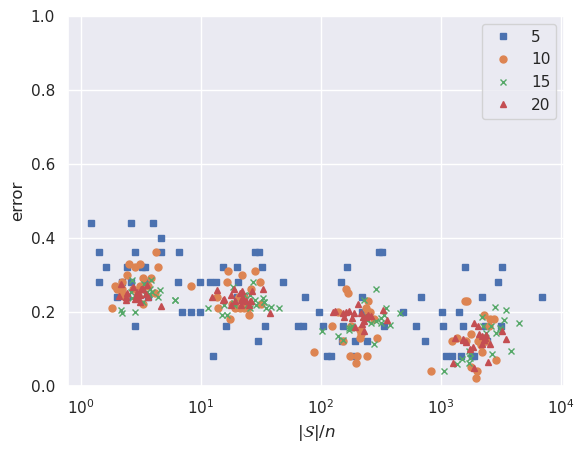

In [301]:

n_vec = [5, 10, 15, 20]
markers = ['s', 'o', 'x', '^']
for i in range(4):
    n = n_vec[i]
    data0 = data[data['n']==n]
    plt.semilogx(data0['T']/n, 1-data0['acc'], markers[i], markersize=5, label=f'{n}')
plt.legend()
plt.xlabel('$ |\mathcal{S}|/n $')
plt.ylabel('error')
plt.ylim([0,1])